In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

def set_mpl_params():
    matplotlib.rcdefaults()
    matplotlib.rcParams['text.usetex'] = True            # Use LaTeX for text rendering

    # Update font settings
    matplotlib.rcParams.update({
        'font.family': 'serif',                          # Use serif font family
        'font.serif': 'Palatino',                        # Use Palatino as the standard font
        'text.latex.preamble': r'\usepackage{amsmath} \usepackage{mathpazo}',  # Use the amsmath and mathpazo package for LaTeX
    })

    # Customize the figure size
    matplotlib.rcParams['figure.figsize'] = (8, 6)   # Set the default figure size

    # Customize axes
    matplotlib.rcParams['axes.labelsize'] = 24       # Axis label font size
    matplotlib.rcParams['axes.titlesize'] = 24       # Axis title font size
    matplotlib.rcParams['axes.titlepad'] = 15        # Axis title padding
    matplotlib.rcParams['axes.linewidth'] = 1.5        # Axis line width

    # Customize ticks
    matplotlib.rcParams['xtick.labelsize'] = 20      # X-axis tick label size
    matplotlib.rcParams['ytick.labelsize'] = 20      # Y-axis tick label size
    matplotlib.rcParams['xtick.major.width'] = 1.2   # X-axis major tick width
    matplotlib.rcParams['ytick.major.width'] = 1.2   # Y-axis major tick width
    matplotlib.rcParams['xtick.minor.size'] = 4      # X-axis minor tick size
    matplotlib.rcParams['ytick.minor.size'] = 4      # Y-axis minor tick size
    matplotlib.rcParams['xtick.major.size'] = 8      # X-axis major tick size
    matplotlib.rcParams['ytick.major.size'] = 8      # Y-axis major tick size

    # Customize legend
    matplotlib.rcParams['legend.fontsize'] = 20      # Legend font size
    matplotlib.rcParams['legend.frameon'] = True     # Enable/Disable the frame around the legend

    # Customize grid
    matplotlib.rcParams['grid.color'] = 'gray'       # Grid color
    matplotlib.rcParams['grid.linestyle'] = '-'      # Grid line style
    matplotlib.rcParams['grid.linewidth'] = 0.5      # Grid line width

    # Customize lines
    matplotlib.rcParams['lines.linewidth'] = 2.5       # Line width
    matplotlib.rcParams['lines.markersize'] = 10       # Marker size

    # Change figure and axes background colors
    matplotlib.rcParams['figure.facecolor'] = 'white'    # Figure background color
    matplotlib.rcParams['axes.facecolor'] = 'white'      # Axes background color
    
set_mpl_params()

In [6]:
# Extracted value for the Bulk Energy (Exercise 2, no relaxation)
E_bulk = pd.read_csv("E_bulk.dat", names=["E_bulk"])
E_bulk = E_bulk["E_bulk"].values[0] / 4
print(E_bulk, " eV")
lattice_constant = 4.082  # Angstrom
A_slab = lattice_constant**2

-2.9288913210513  eV


In [7]:
def compute_surface_energy(filename, E_bulk=E_bulk, A_slab=A_slab): 
    df = pd.read_csv(filename,  sep=" ", header=None, names=["n_layers", "n_vac", "E_slab"])
    df["N_atoms"] = 4 * df["n_layers"] 
    df["Energy per Atom"] = df["E_slab"] / df["N_atoms"]
    df["Surface Energy"] = (df["E_slab"] - df["N_atoms"] * E_bulk) / (2 * A_slab)    
    df = df.sort_values(by=["n_layers", "n_vac"]).reset_index(drop=True)
    df.drop_duplicates(subset=["n_layers", "n_vac"], inplace=True)
    return df

In [13]:
df_no_relax = compute_surface_energy("E_slab.dat") 

# display last 5 elements 
display(df_no_relax.tail())

E_CONVERGED = df_no_relax["Surface Energy"].values[-1]
print(E_CONVERGED, " eV/Ang^2")

,n_layers,n_vac,E_slab,N_atoms,Energy per Atom,Surface Energy
131,70,7,-814.932754,280,-2.910474,0.154741
132,80,7,-932.088407,320,-2.912776,0.154741
133,90,7,-1049.244060,360,-2.914567,0.154741
134,100,7,-1166.399713,400,-2.915999,0.154741
135,100,100,-1166.399713,400,-2.915999,0.154741


0.15474106980076766  eV/Ang^2


In [14]:
# Only keep n_layers <= 8 and n_vac <= 8
df_no_relax = df_no_relax[(df_no_relax["n_layers"] <= 8) & (df_no_relax["n_vac"] <= 8)]

# set precision to :.14f
pd.options.display.float_format = '{:.14f}'.format
display(df_no_relax.head())

,n_layers,n_vac,E_slab,N_atoms,Energy per Atom,Surface Energy
0,1,1,-7.08544854333514,4,-1.77136213583378,0.13893636901356
1,1,2,-6.89350757668250,4,-1.72337689417062,0.14469596050210
2,1,3,-6.86780586399872,4,-1.71695146599968,0.14546719432568
3,1,4,-6.86189541580161,4,-1.71547385395040,0.14564454972679
4,1,5,-6.86144068961418,4,-1.71536017240354,0.14565819474028


In [15]:
pivot_df_no_relax = df_no_relax.pivot(index="n_vac", columns="n_layers", values="Surface Energy")
pd.options.display.float_format = '{:.6f}'.format
display(pivot_df_no_relax)

n_layers,1,2,3,4,5,6,7,8
n_vac,,,,,,,,
1,0.138936,0.144696,0.145467,0.145645,0.145658,0.145658,0.145658,0.145658
2,0.144696,0.151998,0.153138,0.153342,0.153356,0.153356,0.153356,0.153356
3,0.145467,0.153138,0.154304,0.154509,0.154523,0.154523,0.154523,0.154523
4,0.145645,0.153342,0.154509,0.154714,0.154727,0.154727,0.154727,0.154727
5,0.145658,0.153356,0.154523,0.154727,0.154741,0.154741,0.154741,0.154741
6,0.145658,0.153356,0.154523,0.154727,0.154741,0.154741,0.154741,0.154741
7,0.145658,0.153356,0.154523,0.154727,0.154741,0.154741,0.154741,0.154741
8,0.145658,0.153356,0.154523,0.154727,0.154741,0.154741,0.154741,0.154741


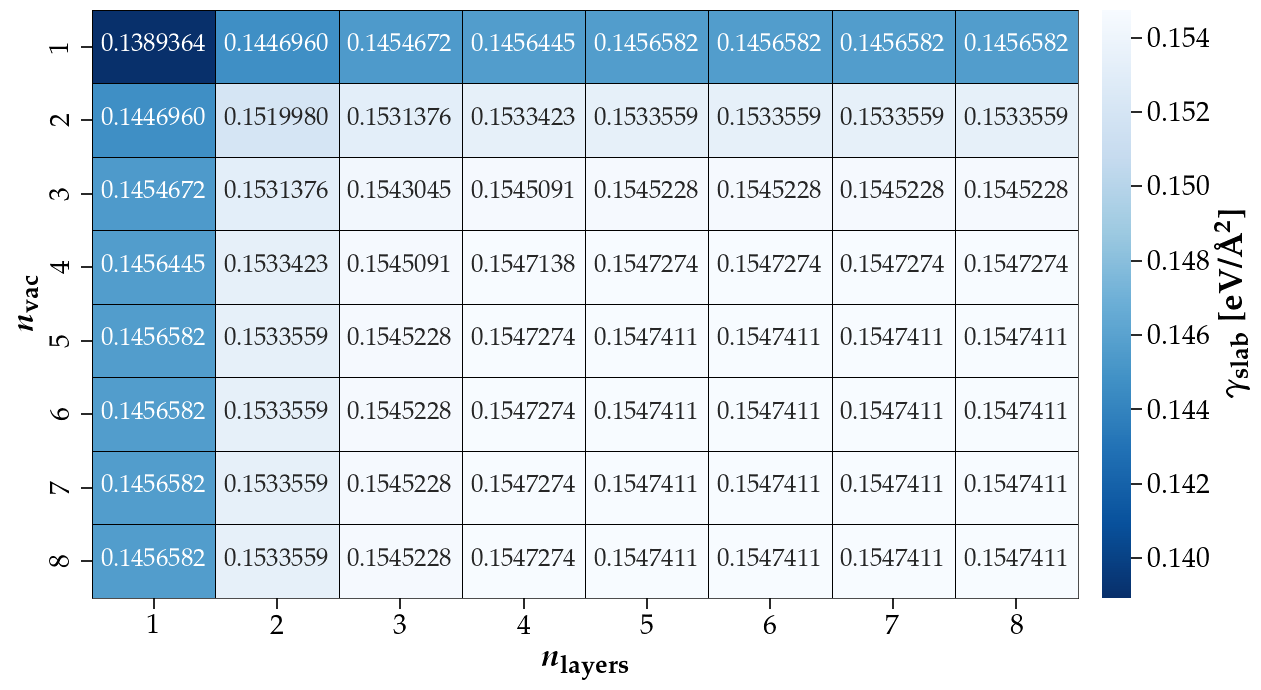

In [ ]:
cmap = sns.color_palette("Blues", as_cmap=True).reversed()

plt.figure(figsize=(13,7))
ax = sns.heatmap(pivot_df_no_relax, annot=True, fmt=".7f", 
                 annot_kws={"size": 18, "weight": "bold"},
                 cmap=cmap, linewidths=0.5, linecolor="black",
                 cbar_kws={"label": r"$\boldsymbol{\gamma_{\rm slab}}$ \textbf{[eV/\AA$^{\mathbf{2}}$]}", "pad": 0.02})

for _, spine in ax.spines.items():
    spine.set_visible(True)  # Ensure all borders are shown
    spine.set_linewidth(0.5)   # Adjust thickness

plt.xlabel(r"$\boldsymbol{n_{\rm layers}}$", fontsize=24)
plt.ylabel(r"$\boldsymbol{n_{\rm vac}}$", fontsize=24)

plt.tight_layout()
plt.savefig("Figures/SurfaceEnergy_no_relax.pdf", bbox_inches="tight")
plt.show()

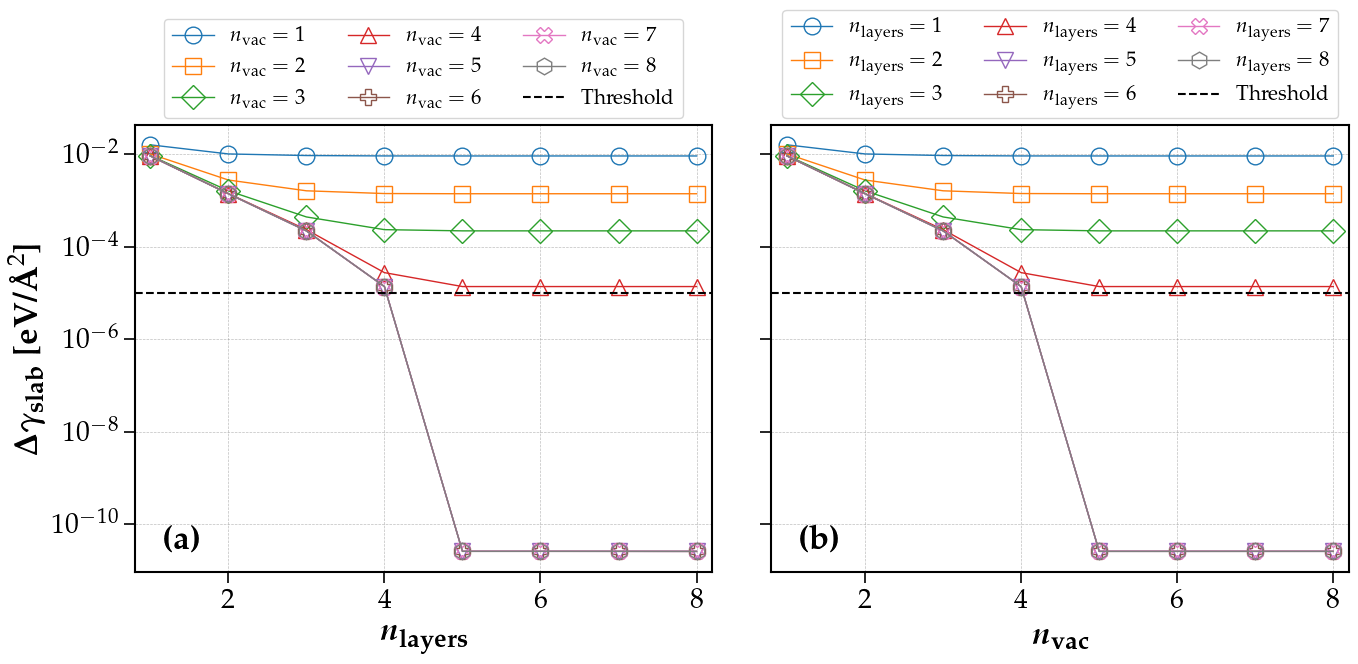

In [43]:
markers = ["o", "s", "D", "^", "v", "P", "X", "h"]
threshold = 1e-5

fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Left plot: Convergence w.r.t n_layers
ax = axes[0]
for n, m in zip(range(1, 9), markers):
    df_n = df_no_relax[df_no_relax["n_vac"] == n].copy()
    
    # Compute convergence as the absolute difference between the current surface energy and the most precise one 
    df_n["error"] = np.abs(df_n["Surface Energy"] - E_CONVERGED)
    ax.semilogy(df_n["n_layers"], df_n["error"], marker=m, label=rf"$n_{{\rm vac}} = {n}$", 
                 linewidth=1, markersize=12, markerfacecolor="None", linestyle="-")

ax.axhline(threshold, color="black", linestyle="--", label="Threshold", linewidth=1.5)
ax.set_xlabel(r"$\boldsymbol{n_{\rm layers}}$", fontsize=24)
ax.set_ylabel(r"$\boldsymbol{\Delta\gamma_{\rm slab}}$ \textbf{[eV/\AA$^2$]}", fontsize=24)
ax.grid(True, which="both", ls="--", alpha=0.5)

# Right plot: Convergence w.r.t n_vac
ax = axes[1]
for n, m in zip(range(1, 9), markers):
    df_n = df_no_relax[df_no_relax["n_layers"] == n].copy()
    df_n["error"] = np.abs(df_n["Surface Energy"] - E_CONVERGED)
    ax.semilogy(df_n["n_vac"], df_n["error"], marker=m, label=rf"$n_{{\rm layers}} = {n}$", 
                 linewidth=1, markersize=12, markerfacecolor="None", linestyle="-")

ax.axhline(threshold, color="black", linestyle="--", linewidth=1.5, label="Threshold")
ax.set_xlabel(r"$\boldsymbol{n_{\rm vac}}$", fontsize=24)
ax.grid(True, which="both", ls="--", alpha=0.5)

axes[0].legend(fontsize=15, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.26))
axes[1].legend(fontsize=15, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.28))

axes[0].text(0.05, 0.05, r"\textbf{(a)}", transform=axes[0].transAxes, fontsize=24, fontweight="bold")
axes[1].text(0.05, 0.05, r"\textbf{(b)}", transform=axes[1].transAxes, fontsize=24, fontweight="bold")

axes[0].set_xlim(0.8, 8.2)
axes[1].set_xlim(0.8, 8.2)

plt.tight_layout()
plt.savefig("Figures/Convergence_n_layers_n_vac.pdf", bbox_inches="tight")
plt.show()


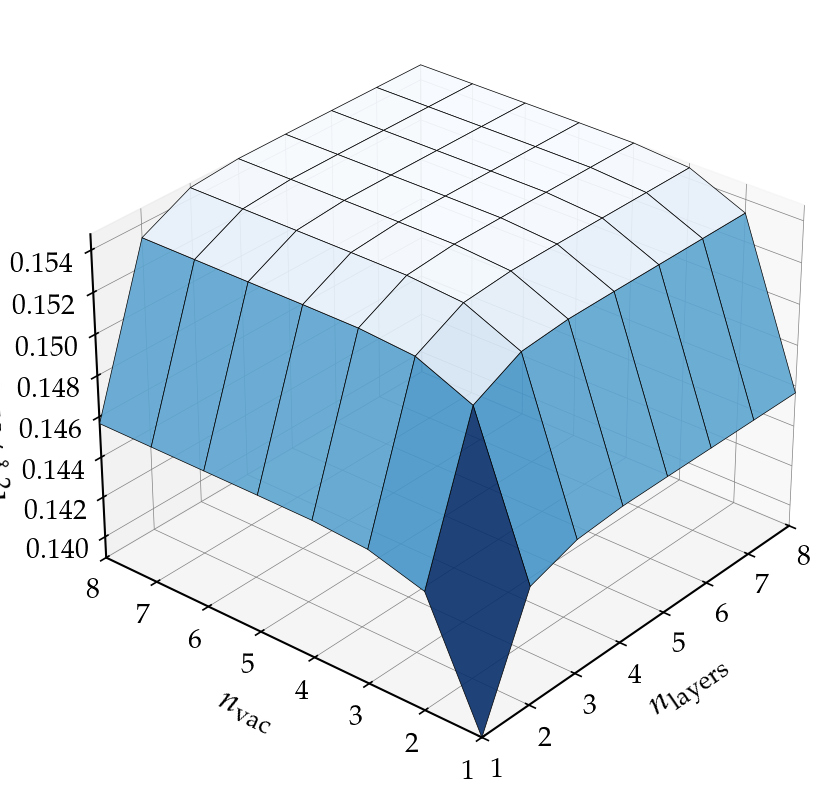

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Meshgrid pour X, Y
X, Y = np.meshgrid(pivot_df_no_relax.columns, pivot_df_no_relax.index)
Z = pivot_df_no_relax.values

# Création de la figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot de la surface
ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor='k', linewidth=0.5, alpha=0.9, antialiased=True)

# Ajuster la vue pour améliorer la lisibilité
ax.view_init(elev=30, azim=220)  # Modifier l'élévation et l'azimut si nécessaire

ax.tick_params(axis='z', pad=12)  # Décale les ticks pour ne pas être collés à la boîte
ax.set_zlabel(r"$\gamma_{\rm slab}$ [eV/\AA$^2$]", fontsize=24, labelpad=25)  # Augmenter labelpad

ax.set_xlabel(r"$n_{\rm layers}$", fontsize=24, labelpad=15)
ax.set_ylabel(r"$n_{\rm vac}$", fontsize=24, labelpad=15)

ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())

# Sauvegarde et affichage
plt.tight_layout(h_pad=0, w_pad=0.5)
plt.savefig("Figures/SurfaceEnergy_no_relax_3D.pdf")
plt.show()


In [67]:
2**(1/6) * 2.648

2.97227950392322

In [37]:
E_s = 1275.21 * 1e-7  # J/cm^2

J = 1 / 1.602176634e-19
cm = 1e8

conversion = J / cm**2

print(f"Surface energy {E_s * conversion:.15f} eV/angstrom^2")

Surface energy 0.079592347868431 eV/angstrom^2


In [ ]:
# Create a supercell
%run create_slab.py Ag 4.082 100 100

Lattice vectors:
 4.082000 0.000000 0.000000
0.000000 4.082000 0.000000
0.000000 0.000000 816.400000
Atomic positions (fractional):
 [[0.     0.     0.    ]
 [0.5    0.5    0.    ]
 [0.     0.5    0.0025]
 ...
 [0.5    0.5    0.495 ]
 [0.     0.5    0.4975]
 [0.5    0.     0.4975]]

Ag_slab_nlayer100_nvac100 has been created.
